In [6]:
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt

In [5]:
img = scipy.misc.ascent()          ### ascent is a greyscale 512*512 size image

(512, 512)

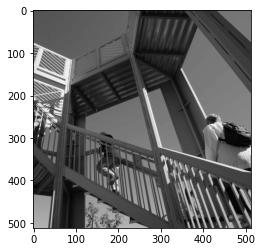

In [11]:
plt.gray()
plt.imshow(img)
img.shape

In [48]:
#### defining a convolution filter

##filter = [[ 0 , 1 , 0 ], [ 1 , -4 , 1 ] , [ 0 , 1 , 0]]    #### always choose a filter whose overall sum is 0 or 1 or use weights to bring sum to 1
##filter = [[-1, -2 , -1] , [0 ,0 ,0] , [-1 , -2 , -1]]
filter = [[1, 2, 1],[2, 4, 2],[1, 2, 1]]   ### gaussian blurr
  
transformed_img = np.copy(img)     ### creating an array of same shape

weight = 1 /16.                ### as sum of all is zero
for i in range( 1 , 511):
    for j in range( 1 , 511):
        convolution = 0.0
        convolution += (filter[0][0]*img[i-1][j-1])
        convolution += (filter[0][1]*img[i-1][j])
        convolution += (filter[0][2]*img[i-1][j+1])
        convolution += (filter[1][0]*img[i][j-1])
        convolution += (filter[1][1]*img[i][j])
        convolution += (filter[1][2]*img[i][j+1])
        convolution += (filter[2][0]*img[i+1][j-1])
        convolution += (filter[2][1]*img[i+1][j])
        convolution += (filter[2][2]*img[i+1][j+1])
        convolution *= weight
        if(convolution<0):
            convolution = 0
        if(convolution>255):
            convolution = 255
        transformed_img[i][j]=convolution

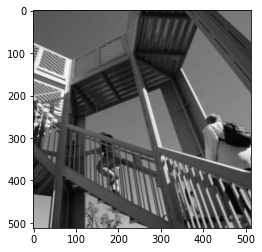

In [49]:
plt.gray()
plt.grid(False)
plt.imshow(transformed_img)


In [50]:
#####max pooling code

In [51]:
list2 = []
for i in range(0 , 512 , 2):
    list1 = []
    for j in range(0 , 512 , 2):
        numbers = []
        numbers.append(transformed_img[i][j])
        numbers.append(transformed_img[i][j+1])
        numbers.append(transformed_img[i+1][j])
        numbers.append(transformed_img[i+1][j+1])
        list1.append(max(numbers))
    list2.append(list1)

In [52]:
print(len(list2[0]))
print(len(list2))

256
256


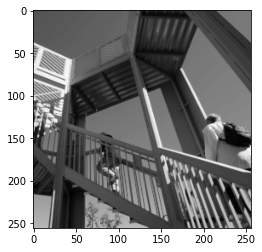

In [53]:
plt.imshow(list2)

In [46]:
### this enhances the features as well as reduces the shape